<a href="https://colab.research.google.com/github/Schreiner-F/Sistemas-de-Control-2-2025/blob/main/2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

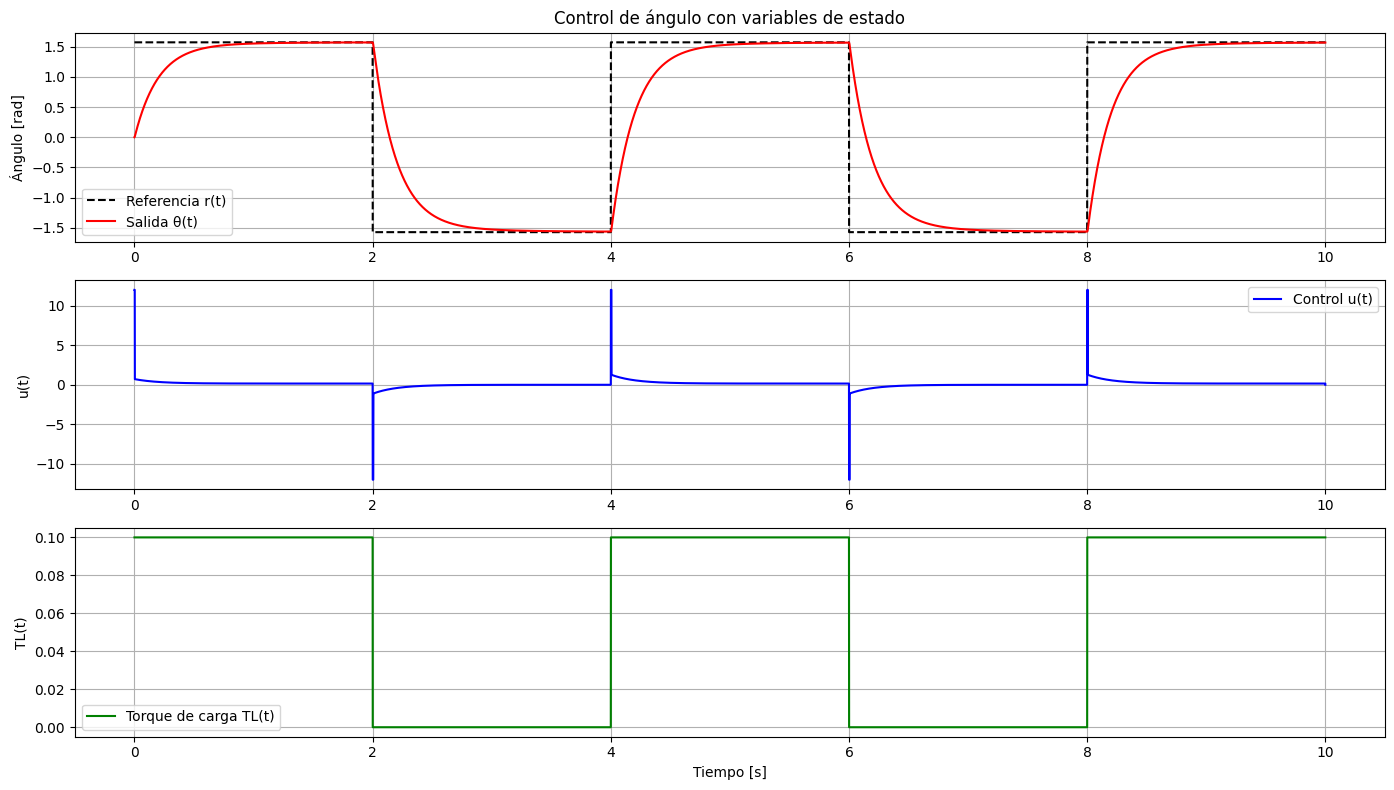

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros de simulación ---
t_final = 10          # Duración total [s]
dt = 1e-4             # Paso de integración
t = np.arange(0, t_final, dt)
N = len(t)

# --- Parámetros del motor ---
Ra = 2.43309          # Resistencia [Ohm]
Laa = 2.43309         # Inductancia [H]
Ki_motor = 0.411      # Constante de inducción [Nm/A]
Km_motor = 0.64803    # Constante del motor [V.s/rad]
J = 0.00258956        # Momento de inercia [kg.m^2]
B = 0.0594551         # Coeficiente de fricción [N.m.s]

# --- Controlador en variables de estado ---
K = np.array([100, 20, 10])   # Ganancias de realimentación para [theta, omega, corriente]
kr = 100                    # Ganancia para la referencia ajustada

# --- Inicialización de variables ---
x = np.zeros((3, N))        # Estados: [theta, omega, corriente]
u = np.zeros(N)             # Señal de control
y = np.zeros(N)             # Salida (ángulo)
r = np.zeros(N)             # Referencia
TL = np.zeros(N)            # Torque de carga

# --- Definir referencia y torque de carga ---
for k in range(N):
    # Cambia cada 2 segundos
    if int(t[k] // 2) % 2 == 0:
        r[k] = np.pi / 2
        TL[k] = 0.1          # Torque de carga solo aparece para π/2
    else:
        r[k] = -np.pi / 2
        TL[k] = 0.0          # Torque de carga nulo para -π/2

# --- Simulación usando integración de Euler ---
for k in range(N - 1):
    # Controlador en variables de estado
    u[k] = -np.dot(K, x[:, k]) + kr * r[k]

    # Verificar saturación de la entrada
    u[k] = np.clip(u[k], -12, 12)

    # Dinámica del motor
    # Ecuaciones diferenciales en variables de estado
    dx1 = x[1, k]  # theta_dot = omega
    dx2 = (1 / J) * (-B * x[1, k] + Km_motor * u[k] - TL[k])  # omega_dot
    dx3 = (-Ra / Laa) * x[2, k] + (Ki_motor / Laa) * x[1, k] - (1 / Laa) * u[k]  # corriente_dot

    # Actualización del estado
    x[0, k + 1] = x[0, k] + dx1 * dt  # theta
    x[1, k + 1] = x[1, k] + dx2 * dt  # omega
    x[2, k + 1] = x[2, k] + dx3 * dt  # corriente

    # Salida: ángulo
    y[k] = x[0, k]  # theta

y[-1] = x[0, -1]  # Última salida

# --- Gráficos ---
plt.figure(figsize=(14, 8))

# Ángulo
plt.subplot(3, 1, 1)
plt.plot(t, r, '--', label='Referencia r(t)', color='black')
plt.plot(t, y, label='Salida θ(t)', color='red')
plt.ylabel('Ángulo [rad]')
plt.title('Control de ángulo con variables de estado')
plt.grid(True)
plt.legend()

# Entrada de control
plt.subplot(3, 1, 2)
plt.plot(t, u, label='Control u(t)', color='blue')
plt.ylabel('u(t)')
plt.grid(True)
plt.legend()

# Torque de carga
plt.subplot(3, 1, 3)
plt.plot(t, TL, label='Torque de carga TL(t)', color='green')
plt.ylabel('TL(t)')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
